In [23]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import spacy

In [25]:
spacy.cli.download("en_core_web_sm")

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 3.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
! python -m spacy download en_core_web_sm


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
import spacy

# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

#  text
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

# Process the text with spaCy
doc = nlp(text)

# Initialize lists to store tokens and labels
tokens = []
labels = []

# Iterate through the processed tokens
for token in doc:
    tokens.append(token.text)
    
    # If the token has an entity label, add it; otherwise, add "O" for untagged
    if token.ent_type_:
        labels.append(token.ent_type_)
    else:
        labels.append("O")

# Now, 'tokens' contains the tokens, and 'labels' contains the corresponding labels
spacy_annotations = list(zip(tokens, labels))

In [36]:

def merge_iob_tokens(annotations):
    merged_annotations = []
    current_entity = None
    current_tokens = []

    for token, label in annotations:
        if label == 'O':
            # 'O' tag, no merging needed
            if current_entity:
                merged_annotations.append((' '.join(current_tokens), current_entity))
                current_entity = None
                current_tokens = []
            merged_annotations.append((token, 'O'))
        else:
            iob_prefix, entity = label.split('-')
            
            if iob_prefix == 'B':
                # Start a new entity
                if current_entity:
                    merged_annotations.append((' '.join(current_tokens), current_entity))
                    current_tokens = []
                current_entity = entity
                current_tokens = [token]
            elif iob_prefix == 'I':
                # Continue the current entity
                if current_entity == entity:
                    current_tokens.append(token)
                else:
                    # Start a new entity if the entity type changes
                    if current_entity:
                        merged_annotations.append((' '.join(current_tokens), current_entity))
                        current_tokens = []
                    current_entity = entity

    # Append the last entity if any
    if current_entity:
        merged_annotations.append((' '.join(current_tokens), current_entity))

    return merged_annotations


In [29]:
len(spacy_annotations)

3055

In [30]:
spacy_annotations

[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'CARDINAL'),
 ('.', 'O'),
 ('The', 'ORG'),
 ('\n ', 'ORG'),
 ('Toeget', 'ORG'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat-', 'O'),
 ('\n ', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa-', 'O'),
 ('\n ', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'O'),
 ('\n ', 'O'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'O'),
 ('mountains', 'O'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('\n ', 'O'),
 ('these', 'O'),

In [31]:
hand_annotated_data = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file:
    for line in iob_file:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data.append((token, label))

In [32]:
print(len(hand_annotated_data))
hand_annotated_data

2990


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'B-GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'B-CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'B-QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'

In [38]:
merged_hand_annotations = merge_iob_tokens(hand_annotated_data)
print(len(merged_hand_annotations))
merged_hand_annotations

2706


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura mountains', 'LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'),
 ('summiu', 'O'),
 (

/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.7637037037037037
Weighted PRECISION score for subsets = 0.7602377092026144

Micro RECALL score for subsets = 0.7637037037037037
Weighted RECALL score for subsets = 0.7637037037037037

Micro F1 score for subsets = 0.7637037037037037
Weighted F1 score for subsets = 0.7618121237221112

Individual label performance: 
Accuracy score:  0.7637037037037037
              precision    recall  f1-score   support

    CARDINAL       0.01      0.06      0.02        16
        DATE       0.11      0.08      0.09        62
       EVENT       0.00      0.00      0.00         5
         FAC       0.00      0.00      0.00        19
         GPE       0.05      0.04      0.05        47
    LANGUAGE       0.00      0.00      0.00         0
         LAW       0.00      0.00      0.00         1
         LOC       0.00      0.00      0.00        43
       MONEY       0.07      0.06      0.0

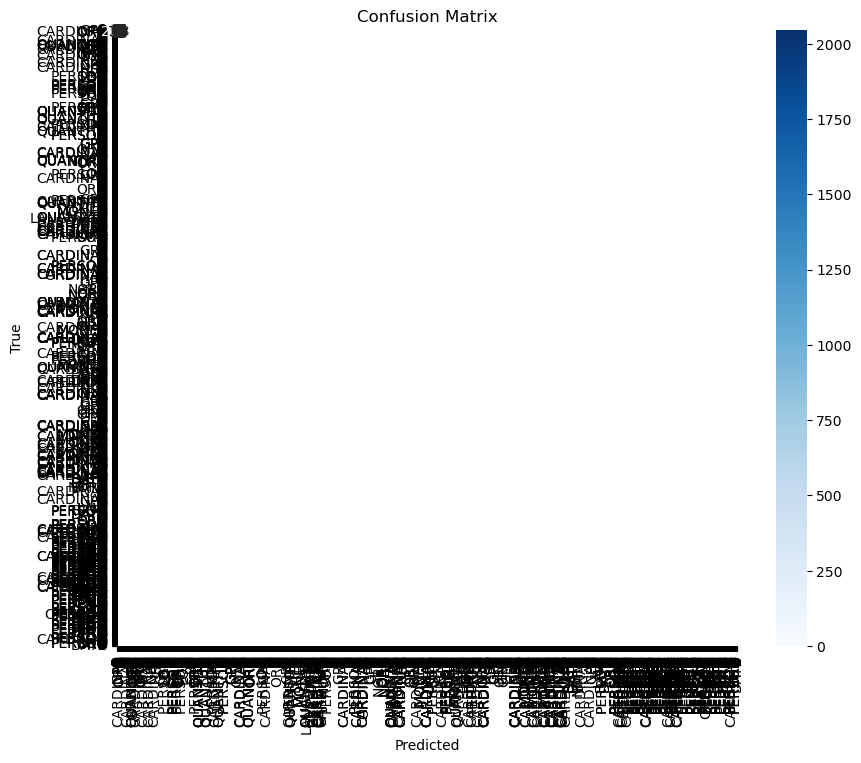

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hand_subset_1 = merged_hand_annotations[:2700]
spacy_subset_1 = spacy_annotations[:2700]

y_true_1 = [label for token, label in hand_subset_1]
y_pred_1 = [label for token, label in spacy_subset_1]

prec_score_micro_2 = precision_score(y_true_1, y_pred_1, average='micro')
prec_score_weighted_2 = precision_score(y_true_1, y_pred_1, average='weighted')

rec_score_micro_2 = recall_score(y_true_1, y_pred_1, average='micro')
rec_score_weighted_2 = recall_score(y_true_1, y_pred_1, average='weighted')

f1_score_micro_2 = f1_score(y_true_1, y_pred_1, average='micro')
f1_score_weighted_2 = f1_score(y_true_1, y_pred_1, average='weighted')



print("Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_2}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_2}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_2}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_2}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_2}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_2}')
print()
print ("Individual label performance: ")
print ("Accuracy score: ", accuracy_score(y_true_1, y_pred_1))
print (classification_report(y_true_1, y_pred_1))


labels_2 = sorted(list(set(y_true_1 + y_pred_1)))

conf_matrix_2 = confusion_matrix(y_true_1, y_pred_1, labels=labels_2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()